# Whisp

## Environmental Sound Classifer with fastai

*by Johann Diedrick, based on the work from fastai's [Deep Learning course](https://course.fast.ai/).*

In [58]:
from fastai.vision import *

In [59]:
path = Path('spectrograms')

In [60]:
path.ls()

[PosixPath('spectrograms/crickets'),
 PosixPath('spectrograms/cow'),
 PosixPath('spectrograms/airplane'),
 PosixPath('spectrograms/footsteps'),
 PosixPath('spectrograms/keyboard_typing'),
 PosixPath('spectrograms/rooster'),
 PosixPath('spectrograms/glass_breaking'),
 PosixPath('spectrograms/sheep'),
 PosixPath('spectrograms/crying_baby'),
 PosixPath('spectrograms/door_wood_creaks'),
 PosixPath('spectrograms/washing_machine'),
 PosixPath('spectrograms/church_bells'),
 PosixPath('spectrograms/chainsaw'),
 PosixPath('spectrograms/drinking_sipping'),
 PosixPath('spectrograms/brushing_teeth'),
 PosixPath('spectrograms/snoring'),
 PosixPath('spectrograms/cat'),
 PosixPath('spectrograms/pig'),
 PosixPath('spectrograms/sneezing'),
 PosixPath('spectrograms/crow'),
 PosixPath('spectrograms/mouse_click'),
 PosixPath('spectrograms/water_drops'),
 PosixPath('spectrograms/can_opening'),
 PosixPath('spectrograms/wind'),
 PosixPath('spectrograms/insects'),
 PosixPath('spectrograms/car_horn'),
 PosixPa

## View data

In [61]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=360, num_workers=4).normalize(imagenet_stats) #changed size from 224 to 360

Good! Let's take a look at some of our spectrograms.

In [62]:
data.classes

['airplane',
 'breathing',
 'brushing_teeth',
 'can_opening',
 'car_horn',
 'cat',
 'chainsaw',
 'chirping_birds',
 'church_bells',
 'clapping',
 'clock_alarm',
 'clock_tick',
 'coughing',
 'cow',
 'crackling_fire',
 'crickets',
 'crow',
 'crying_baby',
 'dog',
 'door_wood_creaks',
 'door_wood_knock',
 'drinking_sipping',
 'engine',
 'fireworks',
 'footsteps',
 'frog',
 'glass_breaking',
 'hand_saw',
 'helicopter',
 'hen',
 'insects',
 'keyboard_typing',
 'laughing',
 'mouse_click',
 'pig',
 'pouring_water',
 'rain',
 'rooster',
 'sea_waves',
 'sheep',
 'siren',
 'sneezing',
 'snoring',
 'thunderstorm',
 'toilet_flush',
 'train',
 'vacuum_cleaner',
 'washing_machine',
 'water_drops',
 'wind']

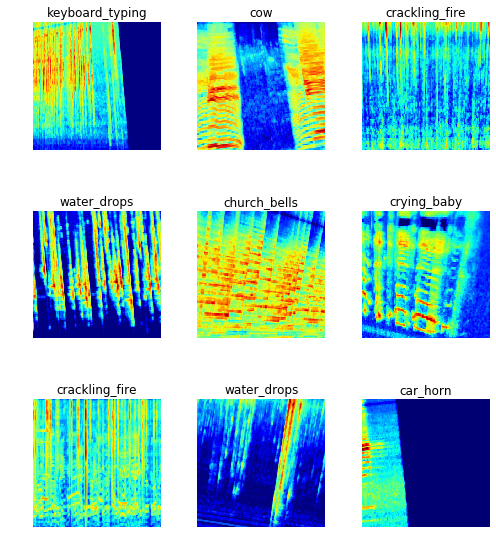

In [63]:
data.show_batch(rows=3, figsize=(7,8))

In [64]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['airplane',
  'breathing',
  'brushing_teeth',
  'can_opening',
  'car_horn',
  'cat',
  'chainsaw',
  'chirping_birds',
  'church_bells',
  'clapping',
  'clock_alarm',
  'clock_tick',
  'coughing',
  'cow',
  'crackling_fire',
  'crickets',
  'crow',
  'crying_baby',
  'dog',
  'door_wood_creaks',
  'door_wood_knock',
  'drinking_sipping',
  'engine',
  'fireworks',
  'footsteps',
  'frog',
  'glass_breaking',
  'hand_saw',
  'helicopter',
  'hen',
  'insects',
  'keyboard_typing',
  'laughing',
  'mouse_click',
  'pig',
  'pouring_water',
  'rain',
  'rooster',
  'sea_waves',
  'sheep',
  'siren',
  'sneezing',
  'snoring',
  'thunderstorm',
  'toilet_flush',
  'train',
  'vacuum_cleaner',
  'washing_machine',
  'water_drops',
  'wind'],
 50,
 1600,
 400)

## Train model

In [65]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [66]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,4.391271,3.445116,0.837500
2,3.565002,2.077962,0.550000
3,2.763873,1.589918,0.457500
4,2.215723,1.384459,0.405000
5,1.812828,1.242562,0.345000
6,1.522293,1.164293,0.332500
7,1.320657,1.123391,0.317500
8,1.217878,1.128977,0.322500


In [67]:
learn.save('stage-1')

In [68]:
learn.unfreeze()

In [69]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.25E-05


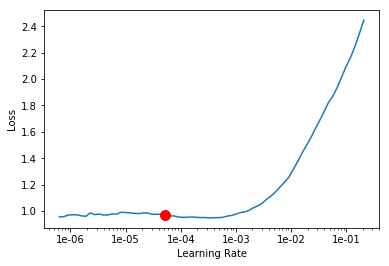

In [13]:
learn.recorder.plot()

In [70]:
learn.fit_one_cycle(10, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate
1,1.063904,1.055990,0.325000
2,1.036396,2.332567,0.562500
3,1.049258,1.470638,0.387500
4,1.032500,1.107848,0.337500
5,0.924266,1.392631,0.417500
6,0.768478,0.623403,0.212500
7,0.596911,0.535597,0.165000
8,0.446205,0.462682,0.160000
9,0.325181,0.419656,0.135000
10,0.251277,0.402070,0.127500


In [71]:
learn.save('stage-2')

## Interpretation

In [18]:
learn.load('stage-2');

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

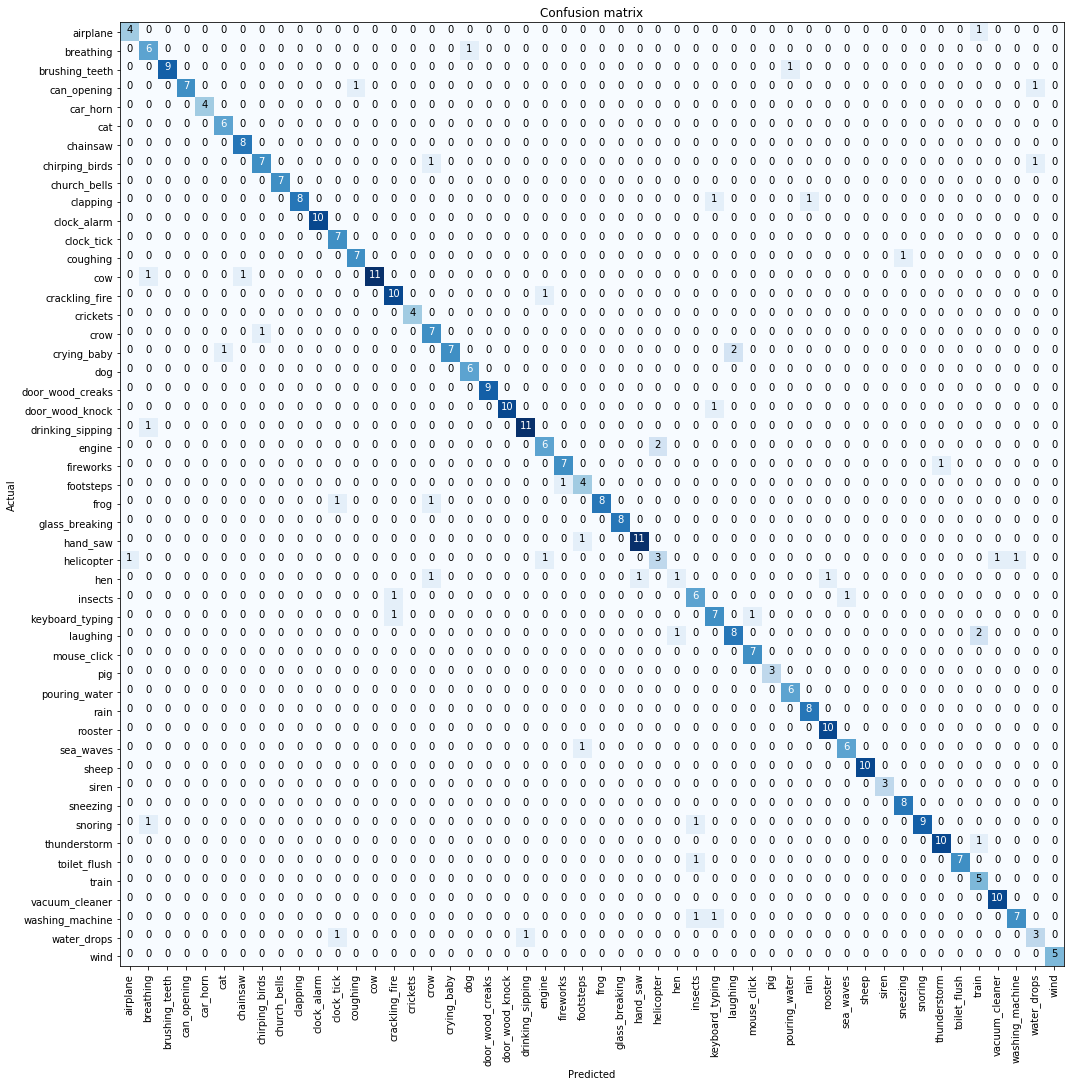

In [57]:
interp.plot_confusion_matrix(figsize=(15, 15))

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [48]:
learn.path

PosixPath('app/models')

In [49]:
learn.data.path

PosixPath('app/models')

In [42]:
learn.path = Path('app/models')
learn.data.path = Path('app/models')

In [44]:
learn.export()

This will create a file named 'export.pkl' in the app/model directory that contains everything we need to deploy our model with our web app!